In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_customers.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
list(df)

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [6]:
df_cat = pd.get_dummies(df['Gender'])
df_num = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_new = pd.concat([df_cat, df_num], axis = 1)
print(df_new.shape)
df_new.head()

(200, 5)


,Female,Male,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,19,15,39
1,0,1,21,15,81
2,1,0,20,16,6
3,1,0,23,16,77
4,1,0,31,17,40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CCFB358>,
      dtype=object)

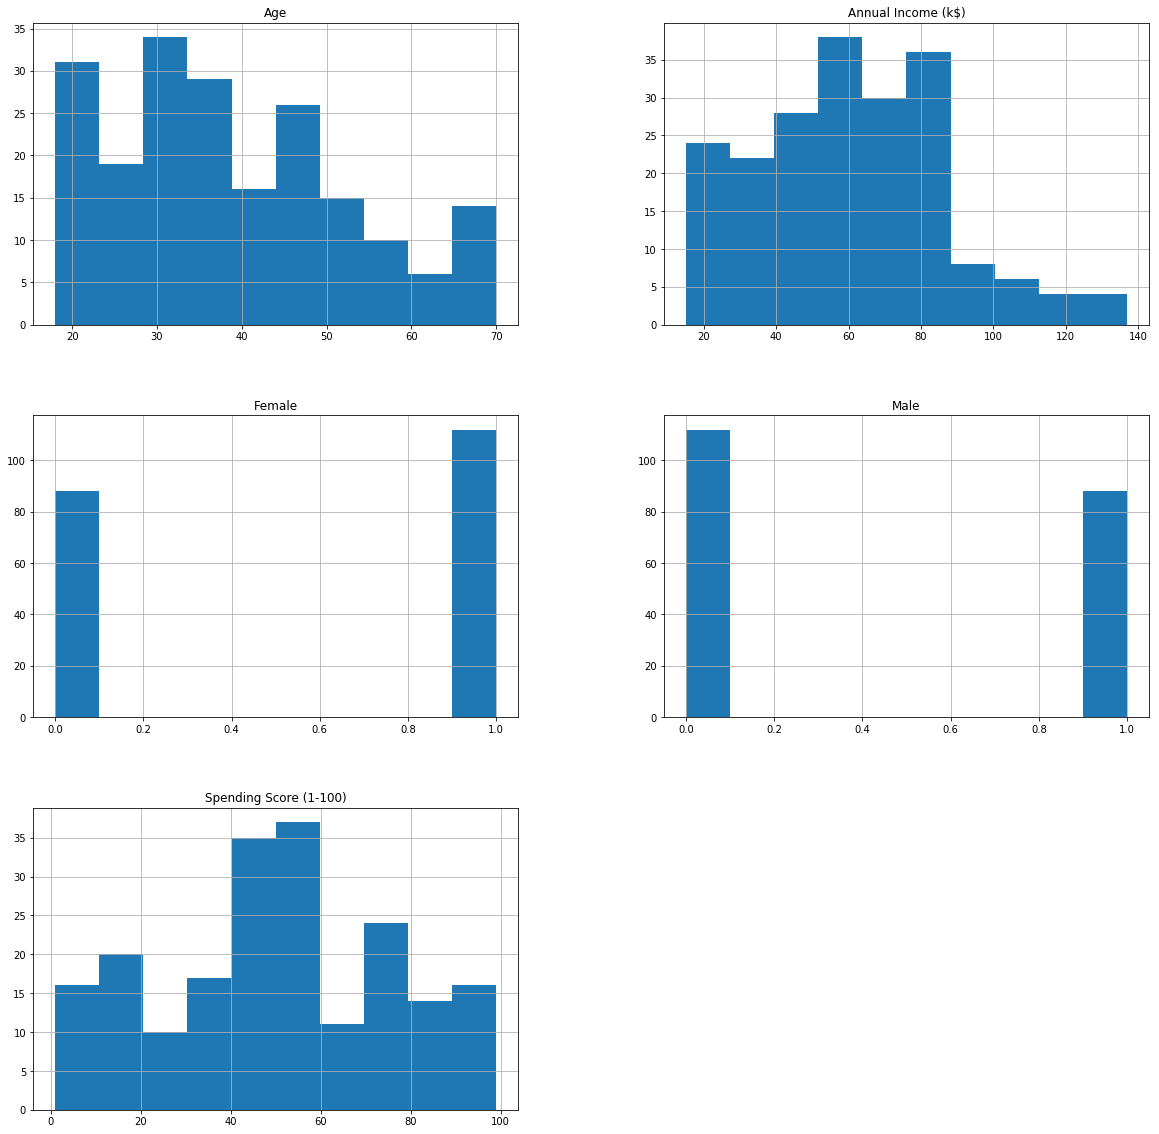

In [28]:
# построим гистограммы распределения признаков
df_new.hist(figsize = (20,20))
# выводы:
#      - среди покупаетелей чуть больше женщин, чем мужчин
#      - 75% клиентов моложе 49 лет
#      - чаще среди покупаетелей встречаютя люди с ежегодным доходом на уровне среднего или ниже

C:\Oracle\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Oracle\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Oracle\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Oracle\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


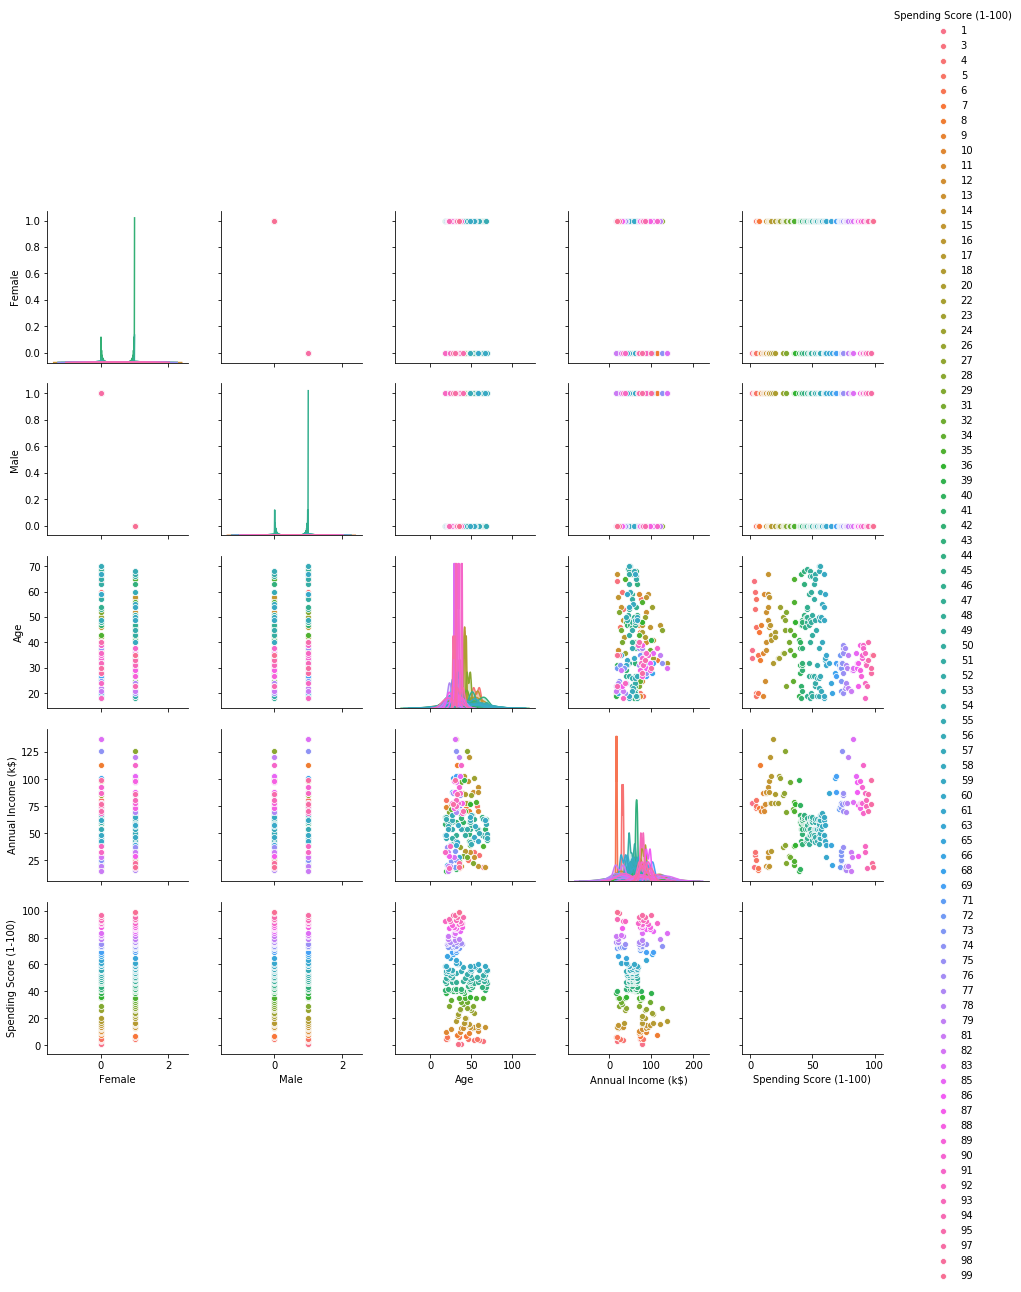

In [29]:
# построим графики попарных зависимостей признаков
seaborn.pairplot(df_new, hue='Spending Score (1-100)', diag_kind="kde")
# вывод: по графикам видно, что:
#              - по гендеру нет различий по остальным показателям
#              - годовой доход клиентов от 30 лет больше, чем до 30, что логично
#              - клиенты со средним достатком обладают средним спросом к покупкам. 
#               При этом клиенты с доходом выше/ниже среднего одинково часто попадают, как в сегмент с высоким, так и с низким спросом

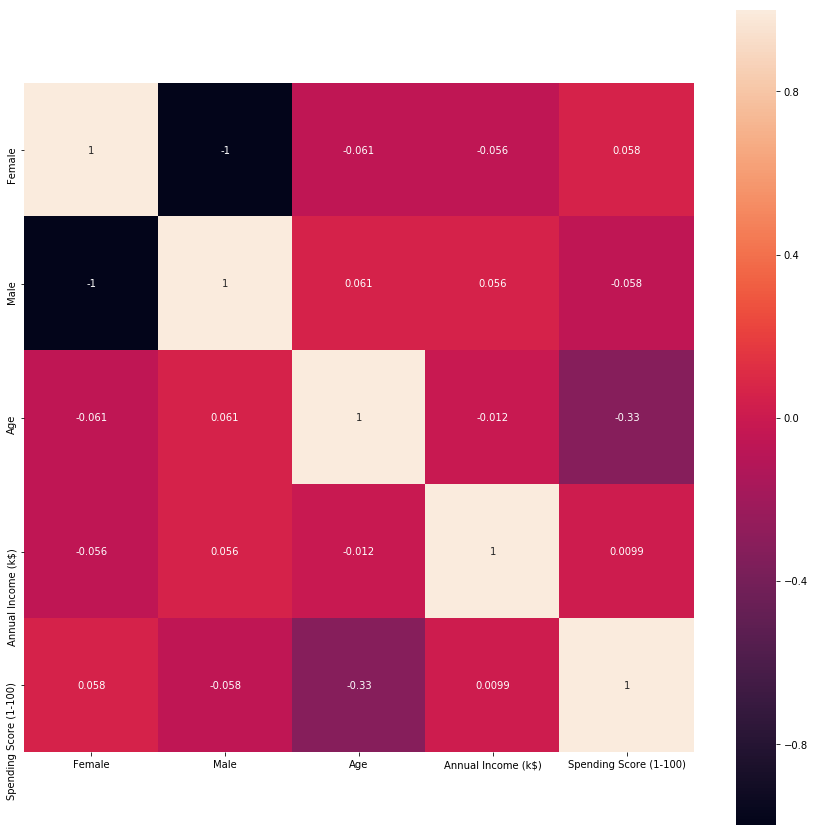

In [30]:
# визуализируем корреляцию между признаками
f, ax = plt.subplots(figsize=(15,15))
seaborn.heatmap(df_new.corr(), square=True, annot=True)
# вывод: сильной линейной зависимости между признаками нет (не считая пола покупателя, что очевидно)

In [7]:
# масштабирование признаков для PCA
from sklearn.preprocessing import MinMaxScaler
minmax_scale  = MinMaxScaler().fit(df_new)
X_minmax = minmax_scale.transform(df_new)
X_minmax = pd.DataFrame(X_minmax, columns = list(df_new))

C:\Oracle\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


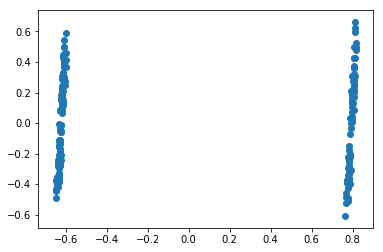

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_minmax)

pca_for_plot = pd.DataFrame(pca_transformed, columns = ['feat_1', 'feat_2'])
plt.scatter(x = pca_for_plot['feat_1'], y = pca_for_plot['feat_2'])

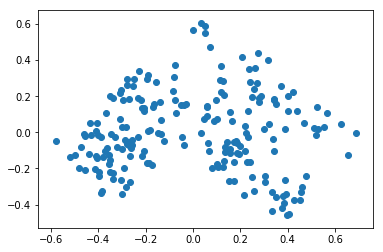

In [9]:
# кластеры разбиваются только на основе признака gender, исключим его
X_minmax_no_gen = X_minmax[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_minmax_no_gen)

pca_for_plot = pd.DataFrame(pca_transformed, columns = ['feat_1', 'feat_2'])
plt.scatter(x = pca_for_plot['feat_1'], y = pca_for_plot['feat_2'])

In [10]:
# с помощью PCA не удалось получить четко разделимых сегментов.
# попробуем другие (нелинейные) методы визуализации данных

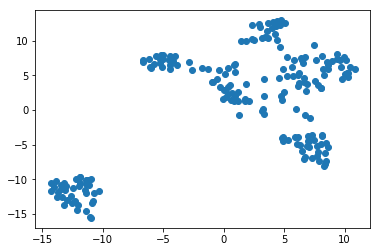

In [11]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm # импортируем цветовые схемы, чтобы рисовать графики.

tsne = TSNE(n_components = 2, random_state = 321)
tsne_representation = tsne.fit_transform(df_new)

tsne_for_plot = pd.DataFrame(tsne_representation, columns = ['feat_1', 'feat_2'])
plt.scatter(x = tsne_for_plot['feat_1'], y = tsne_for_plot['feat_2'])

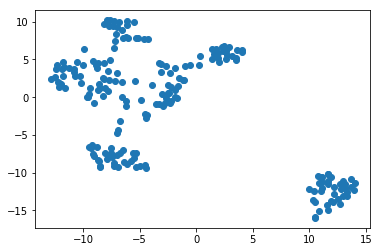

In [12]:
# попробуем исключить гендер и посмотореть, как это отразится на графиках
df_new_no_gen = df_new[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

tsne = TSNE(n_components = 2, random_state = 321)
tsne_representation = tsne.fit_transform(df_new_no_gen)

tsne_for_plot = pd.DataFrame(tsne_representation, columns = ['feat_1', 'feat_2'])
plt.scatter(x = tsne_for_plot['feat_1'], y = tsne_for_plot['feat_2'])

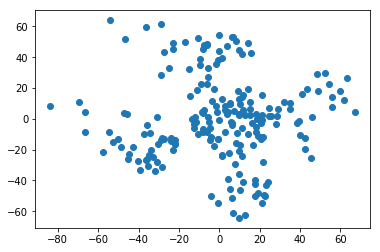

In [13]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances

mds = MDS(n_components = 2, random_state = 321)
MDS_transformed = mds.fit_transform(df_new)

mds_for_plot = pd.DataFrame(MDS_transformed, columns = ['feat_1', 'feat_2'])
plt.scatter(x = mds_for_plot['feat_1'], y = mds_for_plot['feat_2'])

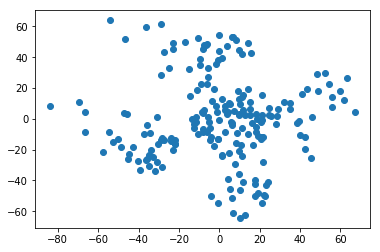

In [14]:
# визуализируем без гендера

mds = MDS(n_components = 2, random_state = 321)
MDS_transformed = mds.fit_transform(df_new_no_gen)

mds_for_plot = pd.DataFrame(MDS_transformed, columns = ['feat_1', 'feat_2'])
plt.scatter(x = mds_for_plot['feat_1'], y = mds_for_plot['feat_2'])

In [15]:
# видим, что при методах визаулизации MDS и TSNE наличие/отсутствие гендера не влияет на графики
# поэтому в дальнейшем не будем использовать данный признак

# по MDS можно предположить, что выделяются 5 сегментов клиентов, по TSNE кол-во кластеров определить сложно
# воспользуемся одним из алгоритмом сегментации k-means и определим оптимальное кол-во кластеров

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

km_silhouette_mds = []

for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=0).fit(mds_for_plot)
    preds = km.predict(mds_for_plot)
    
    silhouette = silhouette_score(mds_for_plot,preds)
    km_silhouette_mds.append([i, silhouette])

In [17]:
km_silhouette_tsne = []

for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=0).fit(tsne_for_plot)
    preds = km.predict(tsne_for_plot)
    
    silhouette = silhouette_score(tsne_for_plot,preds)
    km_silhouette_tsne.append([i, silhouette])

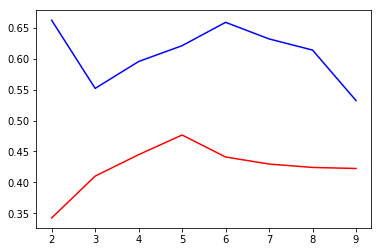

In [18]:
sil = pd.DataFrame(np.concatenate((km_silhouette_mds, km_silhouette_tsne), axis=1), 
             columns = ['num of clusters', 'mds', 'drop', 'tsne'])

plt.plot(sil['num of clusters'], sil['mds'], 'r')
plt.plot(sil['num of clusters'], sil['tsne'], 'b')
plt.show()

In [19]:
km_silhouette_tsne

[[2, 0.6621489],
 [3, 0.5519412],
 [4, 0.59542197],
 [5, 0.6210105],
 [6, 0.65877485],
 [7, 0.63193995],
 [8, 0.61390376],
 [9, 0.53224784]]

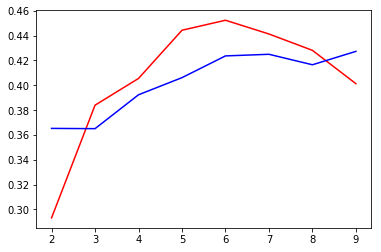

In [20]:
km_silhouette_df = []

for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=0).fit(df_new_no_gen)
    preds = km.predict(df_new_no_gen)
    
    silhouette = silhouette_score(df_new_no_gen,preds)
    km_silhouette_df.append([i, silhouette])
    
km_silhouette_minmax = []

for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=0).fit(X_minmax_no_gen)
    preds = km.predict(X_minmax_no_gen)
    
    silhouette = silhouette_score(X_minmax_no_gen,preds)
    km_silhouette_minmax.append([i, silhouette])
    
    
sil = pd.DataFrame(np.concatenate((km_silhouette_df, km_silhouette_minmax), axis=1), 
             columns = ['num of clusters', 'df', 'drop', 'minmax'])

plt.plot(sil['num of clusters'], sil['df'], 'r')
plt.plot(sil['num of clusters'], sil['minmax'], 'b')
plt.show()

In [ ]:
# на основе всех рассмотренных способов, кажется, что кластериазция на 6 сегментов самая удачная

In [21]:
km = KMeans(n_clusters=6, random_state=0).fit(tsne_for_plot)
preds = km.predict(tsne_for_plot) 

In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_new_no_gen, preds)

In [24]:
res = clf.predict(df_new_no_gen)
from sklearn.metrics import accuracy_score
accuracy_score(preds, res)

1.0

In [32]:
df_new_no_gen['cluster'] = preds

C:\Oracle\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


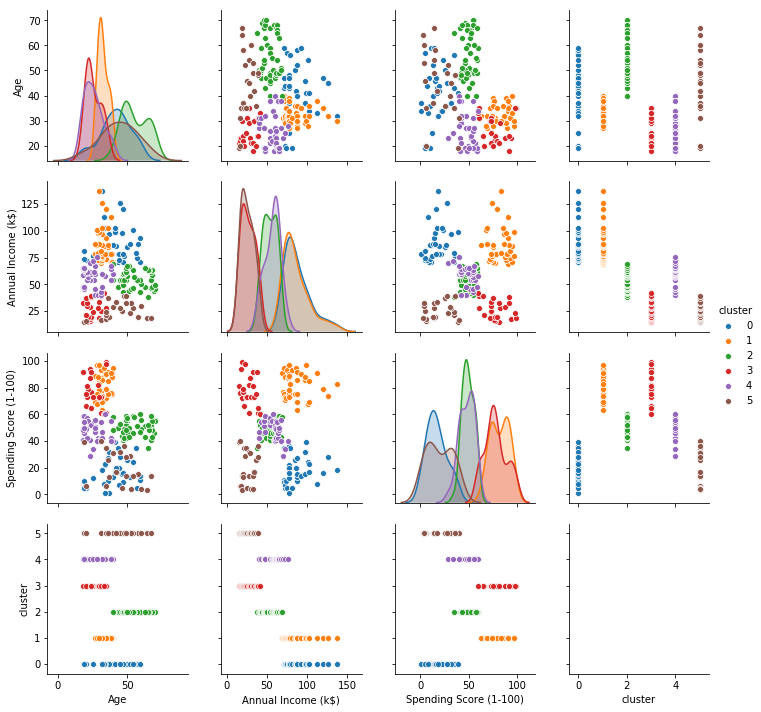

In [33]:
seaborn.pairplot(df_new_no_gen, hue='cluster', diag_kind="kde")